In [0]:
!wget -c https://repo.continuum.io/miniconda/Miniconda3-latest-Linux-x86_64.sh
!chmod +x Miniconda3-latest-Linux-x86_64.sh
!time bash ./Miniconda3-latest-Linux-x86_64.sh -b -f -p /usr/local
!time conda install -q -y -c conda-forge rdkit

--2019-11-09 22:37:52--  https://repo.continuum.io/miniconda/Miniconda3-latest-Linux-x86_64.sh
Resolving repo.continuum.io (repo.continuum.io)... 104.18.200.79, 104.18.201.79, 2606:4700::6812:c84f, ...
Connecting to repo.continuum.io (repo.continuum.io)|104.18.200.79|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 71785000 (68M) [application/x-sh]
Saving to: ‘Miniconda3-latest-Linux-x86_64.sh’

Miniconda3-latest-L 100%[===================>]  68.46M  99.1MB/s    in 0.7s    

2019-11-09 22:37:55 (99.1 MB/s) - ‘Miniconda3-latest-Linux-x86_64.sh’ saved [71785000/71785000]

PREFIX=/usr/local
Unpacking payload ...
Solving environment: - done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - _libgcc_mutex==0.1=main
    - asn1crypto==1.2.0=py37_0
    - ca-certificates==2019.10.16=0
    - certifi==2019.9.11=py37_0
    - cffi==1.13.0=py37h2e261b9_0
    - chardet==3.0.4=py37_1003
    - conda-package-handling==1.6.0=py37h7b6447c_0
 

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import sys
import os
sys.path.append('/usr/local/lib/python3.7/site-packages/')

In [0]:
pip install pysmiles

In [0]:
!pip install --upgrade -q pygsheets

     |████████████████████████████████| 102kB 5.5MB/s 
     |████████████████████████████████| 143kB 30.3MB/s 
     |████████████████████████████████| 81kB 8.2MB/s 
     |████████████████████████████████| 102kB 10.3MB/s 
     |████████████████████████████████| 153kB 43.6MB/s 
     |████████████████████████████████| 133kB 35.1MB/s 
     |████████████████████████████████| 81kB 9.0MB/s 


In [0]:
from google.colab import auth
auth.authenticate_user()
import gspread
from oauth2client.client import GoogleCredentials
gc = gspread.authorize(GoogleCredentials.get_application_default())

In [0]:
from google.colab import files
uploaded = files.upload()

Saving possible_matrix1.csv to possible_matrix1.csv


In [0]:
from google.colab import files
uploaded = files.upload()

Saving possible_matrix1_headers.csv to possible_matrix1_headers (1).csv


In [0]:
headers = pd.read_csv("possible_matrix1_headers.csv",header=None)
headers = pd.DataFrame.as_matrix(headers)
print(headers)
matrix1 = pd.read_csv("possible_matrix1.csv",header=None)
matrix1 = pd.DataFrame.as_matrix(matrix1)
print(matrix1)

[['C']
 ['C']
 ['C']
 ['C']
 ['C']
 ['C']
 ['C']
 ['O']
 ['O']]
[[0 2 0 0 0 1 0 0 0]
 [2 0 1 0 0 0 0 0 0]
 [0 1 0 2 0 0 0 0 0]
 [0 0 2 0 1 0 0 0 0]
 [0 0 0 1 0 2 0 0 0]
 [1 0 0 0 2 0 1 0 0]
 [0 0 0 0 0 1 0 2 1]
 [0 0 0 0 0 0 2 0 0]
 [0 0 0 0 0 0 1 0 0]]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """


In [0]:
import numpy as np
import pandas as pd
 
from rdkit import Chem
from rdkit.Chem import DataStructs
from rdkit.Chem import AllChem
from rdkit.Chem import RDConfig
from rdkit import rdBase
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem.Draw.MolDrawing import MolDrawing, DrawingOptions #Only needed if modifying defaults

In [0]:
def MolFromGraphs(node_list, adjacency_matrix):

    # create empty editable mol object
    mol = Chem.RWMol()

    # add atoms to mol and keep track of index
    node_to_idx = {}
    for i in range(len(node_list)):
        a = Chem.Atom(node_list[i])
        molIdx = mol.AddAtom(a)
        node_to_idx[i] = molIdx

    # add bonds between adjacent atoms
    for ix, row in enumerate(adjacency_matrix):
        for iy, bond in enumerate(row):

            # only traverse half the matrix
            if iy <= ix:
                continue

            # add relevant bond type (there are many more of these)
            if bond == 0:
                continue
            elif bond == 1:
                bond_type = Chem.rdchem.BondType.SINGLE
                mol.AddBond(node_to_idx[ix], node_to_idx[iy], bond_type)
            elif bond == 2:
                bond_type = Chem.rdchem.BondType.DOUBLE
                mol.AddBond(node_to_idx[ix], node_to_idx[iy], bond_type)

    # Convert RWMol to Mol object
    mol = mol.GetMol()            

    return mol


In [0]:
from pysmiles import read_smiles
import networkx as nx

smiles = 'CCO'
mol = read_smiles(smiles)

# atom vector (C only)
print(mol.nodes(data='element'))
# adjacency matrix
print(nx.to_numpy_matrix(mol))

[(0, 'C'), (1, 'C'), (2, 'O')]
[[0. 1. 0.]
 [1. 0. 1.]
 [0. 1. 0.]]


In [0]:
headers = [6,6,6,6,6,6,6,8,8]

In [0]:
node_list = [6,6,6,6,6,6,6,8,8]
adj_matrix = [[0, 2, 0, 0, 0, 1, 1, 0, 0], [2, 0, 1, 0, 0, 0, 0, 0, 0], [0, 1, 0, 2, 0, 0, 0, 0, 0], [0, 0, 2, 0, 1, 0, 0, 0, 0], [0, 0, 0, 1, 0, 2, 0, 0, 0], [1, 0, 0, 0, 2, 0, 0, 0, 0], [1, 0, 0, 0, 0, 0, 0, 2, 1], [0, 0, 0, 0, 0, 0, 2, 0, 0], [0, 0, 0, 0, 0, 0, 1, 0, 0]]

In [0]:

result = Chem.MolToSmiles(MolFromGraphs(headers, matrix1))



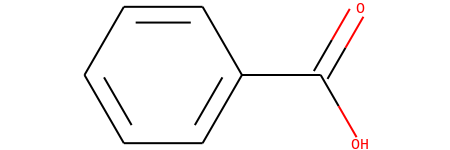

In [0]:
DrawingOptions.bondLineWidth=1.8
my_mol = Chem.MolFromSmiles(result)
my_mol